In [3]:
ls -l /content/kaggle.json

-rw-r--r-- 1 root root 70 Feb 20 05:29 /content/kaggle.json


In [4]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)

In [5]:
!mv kaggle.json /root/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!ls

sample_data


In [8]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:08<00:00, 23.0MB/s]
100% 163M/163M [00:08<00:00, 21.0MB/s]


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the Dependencies

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2403.jpg', 'with_mask_1985.jpg', 'with_mask_2460.jpg', 'with_mask_1002.jpg', 'with_mask_1025.jpg']
['with_mask_70.jpg', 'with_mask_1248.jpg', 'with_mask_2681.jpg', 'with_mask_1910.jpg', 'with_mask_3428.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_816.jpg', 'without_mask_443.jpg', 'without_mask_2708.jpg', 'without_mask_1107.jpg', 'without_mask_1736.jpg']
['without_mask_3756.jpg', 'without_mask_2536.jpg', 'without_mask_3286.jpg', 'without_mask_435.jpg', 'without_mask_1622.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

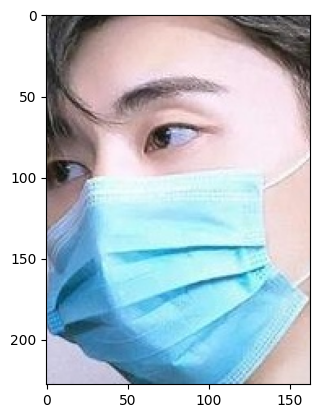

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

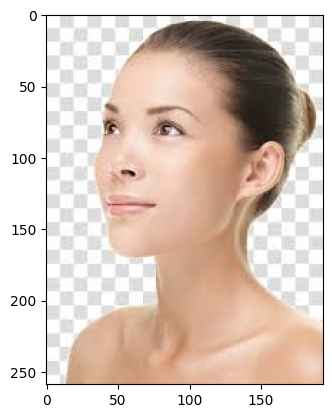

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

 1.Resize the Images

 2.Convert the images to numpy arrays

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[237, 246, 255],
        [237, 246, 255],
        [237, 246, 255],
        ...,
        [239, 226, 210],
        [237, 224, 208],
        [236, 223, 207]],

       [[237, 246, 255],
        [237, 246, 255],
        [237, 246, 255],
        ...,
        [238, 225, 209],
        [237, 224, 208],
        [236, 223, 207]],

       [[237, 246, 255],
        [237, 246, 255],
        [237, 246, 255],
        ...,
        [238, 225, 209],
        [237, 224, 208],
        [236, 223, 207]],

       ...,

       [[222, 240, 254],
        [222, 240, 254],
        [222, 240, 254],
        ...,
        [187, 125,  88],
        [187, 125,  86],
        [189, 128,  84]],

       [[222, 240, 254],
        [222, 240, 254],
        [222, 240, 254],
        ...,
        [186, 124,  87],
        [187, 126,  86],
        [189, 128,  84]],

       [[223, 241, 255],
        [223, 241, 255],
        [223, 241, 255],
        ...,
        [186, 124,  87],
        [187, 125,  85],
        [189, 128,  84]]], dtype=uint8)
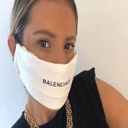

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(Y)

[1 1 1 ... 0 0 0]


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[217, 209, 198],
        [220, 212, 201],
        [223, 215, 204],
        ...,
        [131, 130, 126],
        [130, 129, 125],
        [130, 129, 125]],

       [[217, 209, 198],
        [220, 212, 201],
        [223, 215, 204],
        ...,
        [131, 130, 126],
        [130, 129, 125],
        [130, 129, 125]],

       [[217, 209, 198],
        [220, 212, 201],
        [223, 215, 204],
        ...,
        [131, 130, 126],
        [130, 129, 125],
        [130, 129, 125]],

       ...,

       [[121, 118, 125],
        [117, 114, 121],
        [117, 114, 120],
        ...,
        [ 68,  63,  65],
        [ 82,  78,  79],
        [ 88,  82,  84]],

       [[121, 118, 125],
        [125, 122, 129],
        [120, 118, 124],
        ...,
        [ 70,  66,  68],
        [ 79,  74,  76],
        [ 84,  78,  80]],

       [[123, 120, 127],
        [118, 115, 122],
        [125, 123, 129],
        ...,
        [ 67,  63,  65],
        [ 75,  70,  71],
        [ 81,  75,  77]]], dtype=uint8)
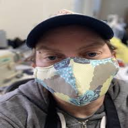

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.85098039, 0.81960784, 0.77647059],
        [0.8627451 , 0.83137255, 0.78823529],
        [0.8745098 , 0.84313725, 0.8       ],
        ...,
        [0.51372549, 0.50980392, 0.49411765],
        [0.50980392, 0.50588235, 0.49019608],
        [0.50980392, 0.50588235, 0.49019608]],

       [[0.85098039, 0.81960784, 0.77647059],
        [0.8627451 , 0.83137255, 0.78823529],
        [0.8745098 , 0.84313725, 0.8       ],
        ...,
        [0.51372549, 0.50980392, 0.49411765],
        [0.50980392, 0.50588235, 0.49019608],
        [0.50980392, 0.50588235, 0.49019608]],

       [[0.85098039, 0.81960784, 0.77647059],
        [0.8627451 , 0.83137255, 0.78823529],
        [0.8745098 , 0.84313725, 0.8       ],
        ...,
        [0.51372549, 0.50980392, 0.49411765],
        [0.50980392, 0.50588235, 0.49019608],
        [0.50980392, 0.50588235, 0.49019608]],

       ...,

       [[0.4745098 , 0.4627451 , 0.49019608],
        [0.45882353, 0.44705882, 0.4745098 ],
        [0.45882353, 0

Building a Convolutional Neural Networks (CNN

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.7095 - loss: 0.7572 - val_acc: 0.8942 - val_loss: 0.2788
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.8702 - loss: 0.3148 - val_acc: 0.8959 - val_loss: 0.2548
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9065 - loss: 0.2445 - val_acc: 0.9124 - val_loss: 0.2230
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9281 - loss: 0.1965 - val_acc: 0.9256 - val_loss: 0.1950
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9271 - loss: 0.1770 - val_acc: 0.9339 - val_loss: 0.1952


Model Evaluation

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9296 - loss: 0.1830
Test Accuracy = 0.9225678443908691


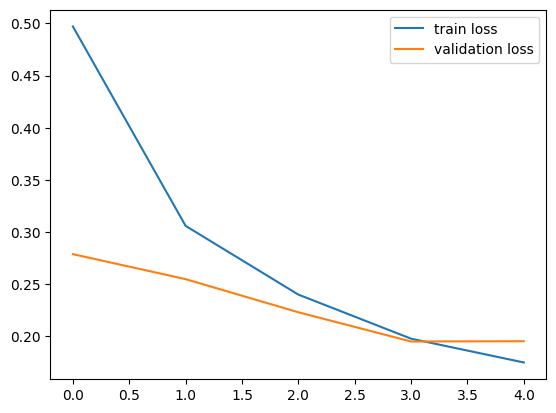

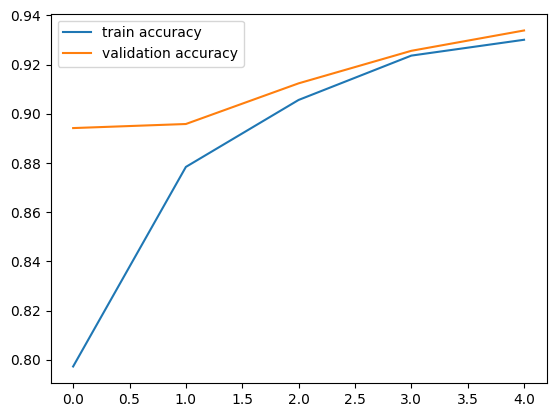

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


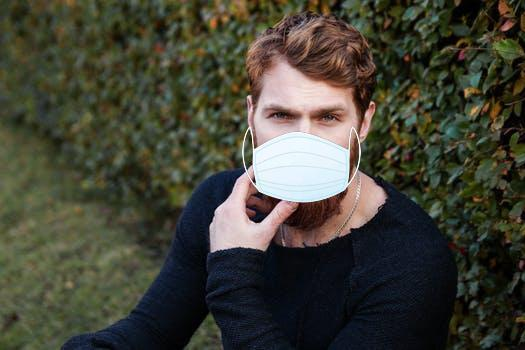

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.50046283 0.5161561 ]]
1
The person in the image is wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1001.jpg


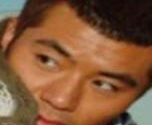

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.5399513  0.49084708]]
0
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')